# Task 4.9. Intro to Data Visualisation with Python

## This script contains:
### 1. Importing Libraries & Data
### 2. Part 2 of Task 4.9

## Importing Libraries & Data

### Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Data

In [2]:
# Create path
path = r'C:\Users\M de Villiers\Desktop\Data Analytics\Acheivement 4\InstaCart_Basket_Analysis_10_01_2022'

In [3]:
# Import dataframe
ords_prods_cust = pd.read_pickle(os.path.join(path, '02_Data', '02_Prepared_Data', 'orders_products_customers.pkl'))

In [4]:
ords_prods_cust.head()

,user_id,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income,...,reordered,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,order_frequency,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,0,Mid-range Product,Busiest days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,Mid-range Product,Regularly busy,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,Mid-range Product,Busiest days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,0,Low-range Product,Regularly busy,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,Low-range Product,Least busy days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [5]:
# Check prices max
ords_prods_cust['prices'].max()

99999.0

In [6]:
# Change prices higher than 100 to NaN
ords_prods_cust.loc[ords_prods_cust['prices'] >100, 'prices'] = np.nan

In [7]:
# Check prices max
ords_prods_cust['prices'].max()

25.0

## Part 2

### Question 3

In [8]:
# Check order_hour_of_day
ords_prods_cust['order_hour_of_day'].value_counts()

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

In [8]:
sns.set(rc={'figure.figsize':(8,6)})
sns.set_theme(style="darkgrid")

In [9]:
 pal_hls = sns.color_palette('Blues_d', 12).as_hex(); print(pal_hls)

['#9ac5e0', '#88b9da', '#76aed4', '#64a3cf', '#5298c9', '#408cc3', '#3781b6', '#3674a0', '#356689', '#355a74', '#344d5e', '#344048']


Text(0, 0.5, 'Orders')

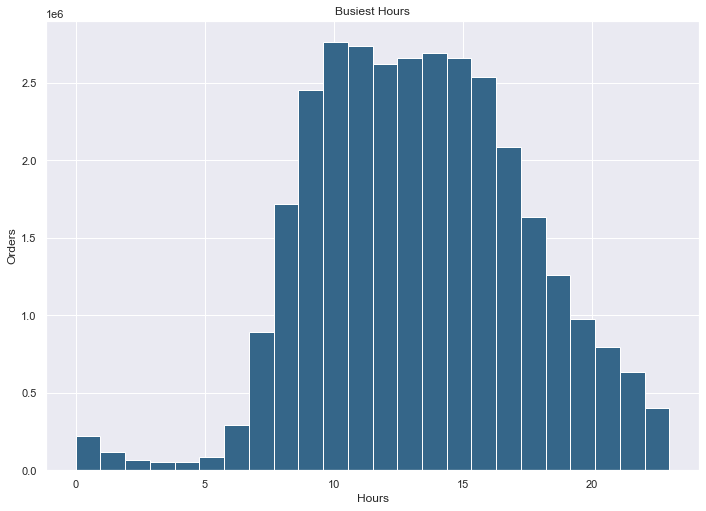

In [11]:
# Create histogram
hist_ord_hod = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24, color = '#356689', title = 'Busiest Hours')
hist_ord_hod.set_xlabel('Hours')
hist_ord_hod.set_ylabel('Orders')

Looking at the Histogram it is clear to see that the busiest time is between 09:00 and 16:00. People are most likely placing orders during their work day when they are already busy on their computers (for work).

### Question 4

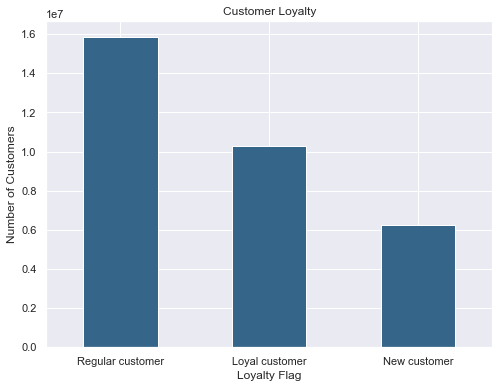

In [11]:
# Create bar chart
bar_loyalty = ords_prods_cust['loyalty_flag'].value_counts().plot.bar(color = '#356689', title = 'Customer Loyalty', xlabel='Loyalty Flag', ylabel='Number of Customers')
plt.xticks(rotation=0, ha='center')

### Question 5

In [13]:
# create a list holding true/false values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [14]:
# Store 70% of the sample in df 'big'
big = ords_prods_cust[dev]

In [15]:
# Store 30 % of sample in df 'small'
small = ords_prods_cust[~dev]

In [16]:
# Check results
len(ords_prods_cust)

32404859

In [17]:
len(big) + len(small)

32404859

In [18]:
# Create new df
df = small[['order_hour_of_day','prices']]

In [19]:
df.head()

,order_hour_of_day,prices
0,9,9.0
2,15,9.0
3,9,4.3
6,9,4.3
10,9,4.0


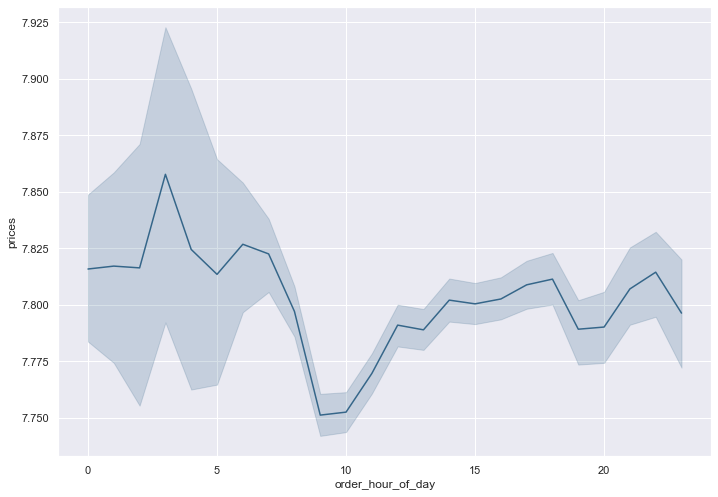

In [20]:
# Create line chart with df
line_ords_prices = sns.lineplot(data = df, x = 'order_hour_of_day', y = 'prices', color = '#356689')

It seems as though there is a drop in the prise of items sold at around 10 am, although this could be a misconception since I changed prices with a value of more than 100 dollars to null. At a quick glance it looked as though 2% milk (low fat milk) was one of the items that had a price of 9999.99 which is impossible. In an ideal situation I would ask the data owner about this discrepency.

### Question 6

In [21]:
# Create new df
df_2 = ords_prods_cust[['Age', 'n_dependants']]

In [22]:
df_2.head()

,Age,n_dependants
0,48,3
1,48,3
2,48,3
3,48,3
4,48,3


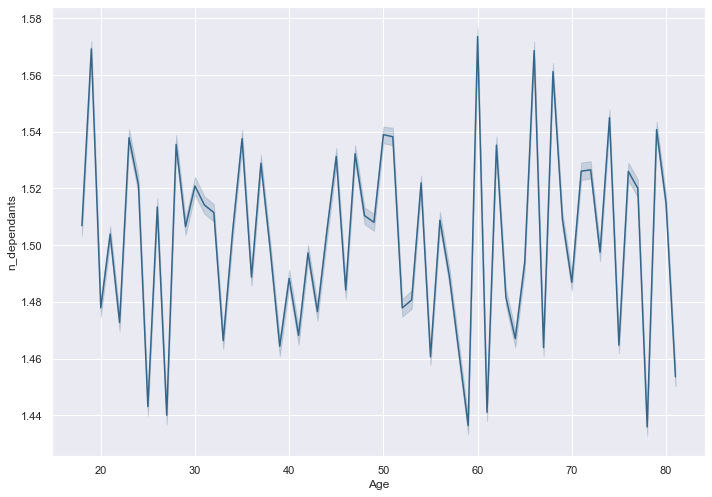

In [23]:
# Create line chart with df_2
line_age_dep = sns.lineplot(data = df_2, x = 'Age', y = 'n_dependants', color = '#356689')

When looking at the line chart it does not seem as though there is a clear relationship between age and the number of dependants. There seems to be no positive correlation. That is, age does not have an influence on how many dependants a user has.

### Question 7

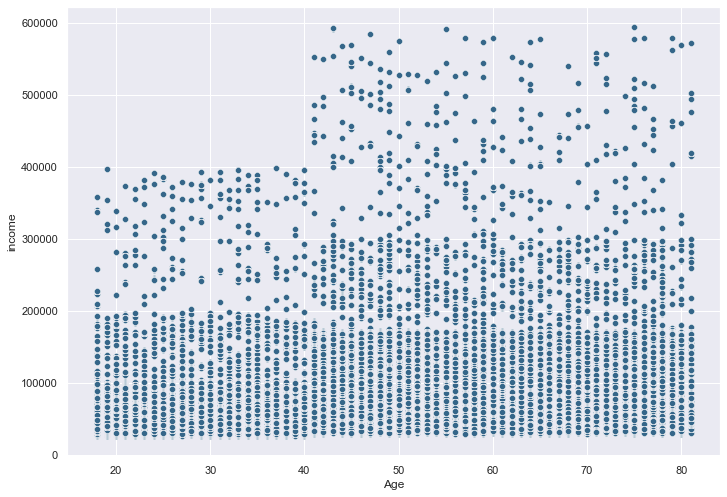

In [24]:
# Create Scatterplot
scatter_age_income = sns.scatterplot(x = 'Age', y = 'income',data = ords_prods_cust, color = '#356689')

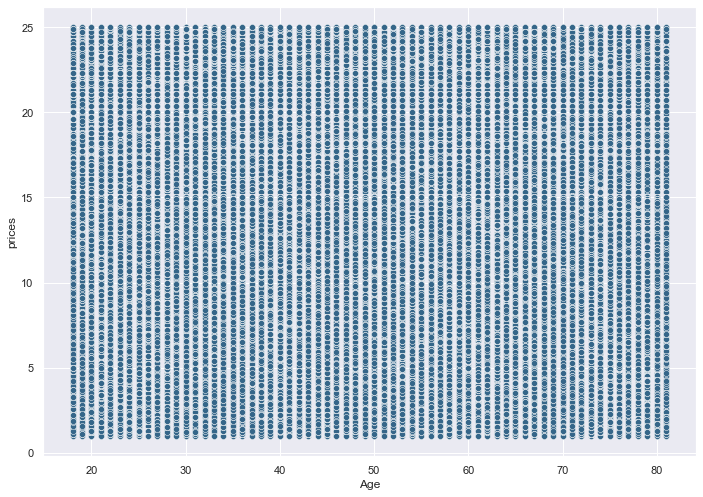

In [25]:
# Create Scatterplot 2
scatter_age_prices = sns.scatterplot(x = 'Age', y = 'prices',data = ords_prods_cust, color = '#356689')

I compared age and income ("spending power") and it seems there is a small connection between age and "spending power" since the maximum income after the age of 40 increases substantially and this would of course increase the average income of people over 40 years of age. I also checked if there is a relationship between age and prices to see if certain ages buy more expensive items but there is also no connection.

### Question 8

In [26]:
# Export Histogram
hist_ord_hod.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'hist_ord_hod.png'))

In [27]:
# Export Bar chart
bar_loyalty.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'bar_loyalty.png'))

In [28]:
# Export line chart of orders and prices
line_ords_prices.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'line_ords_prices.png'))

In [29]:
# Export 2nd line chart: age & dependants
line_age_dep.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'line_age_dep.png'))

In [30]:
# Export scatterplot 1: age & income
scatter_age_income.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'scatter_age_income.png'))

In [31]:
#Export scatterplot 2: Age & prices
scatter_age_prices.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'scatter_age_prices.png'))